### 5.Longest Palindromic Substring
-Given a string s, return the longest palindromic substring in s.

In [7]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        res = ""
        for i in range(len(s)):
            res1 = 1
            res2 = 0
            # loop for odd number
            for j in range(1, min(i+1, len(s)-i)):
                if s[i-j] == s[i+j]:
                    res1 += 2
                else:
                    break
            # loop for even number
            for j in range(min(i+1, len(s)-i-1)):
                if s[i-j] == s[i+j+1]:
                    res2 += 2
                else:
                    break
            # compairing two different types of result
            if res1 > res2:
                a = s[i-res1//2:i+res1//2+1]
            else:
                a = s[i-res2//2+1:i+res2//2+1]
            # if statement to compair prier res an new one "a"
            if len(res) < len(a):
                res = a
        return res

In [12]:
ans = Solution()
ans.longestPalindrome("dbbd")

'dbbd'

### Another aproch for Longest Palindrom Substring - "Manacher’s Algorithm"
1. If the letter's mirror palindrome exists entirely within the larger palindrome
but up to the border, the palindrome length around the current letter is
exactly the same as its mirror's palindrome length(Copy mirror length)
2. If the letter's mirror palindrome exists entirely within the larger palindrome
up to the border then the current letter's palindrome is at least as long as its
mirror's palindrome(Explore beyond mirror length)
3. If the letter's mirror palindrome extends beyond the larger palindrome, then
the current letter's palindrome is at least as long as
2 * (distance t0 right border) + 1(Explore beyond larger palindrome)
4. If the current letter is not contained within a larger palindrome, we know
nothing and need to explore around its center(Explore from scrach)

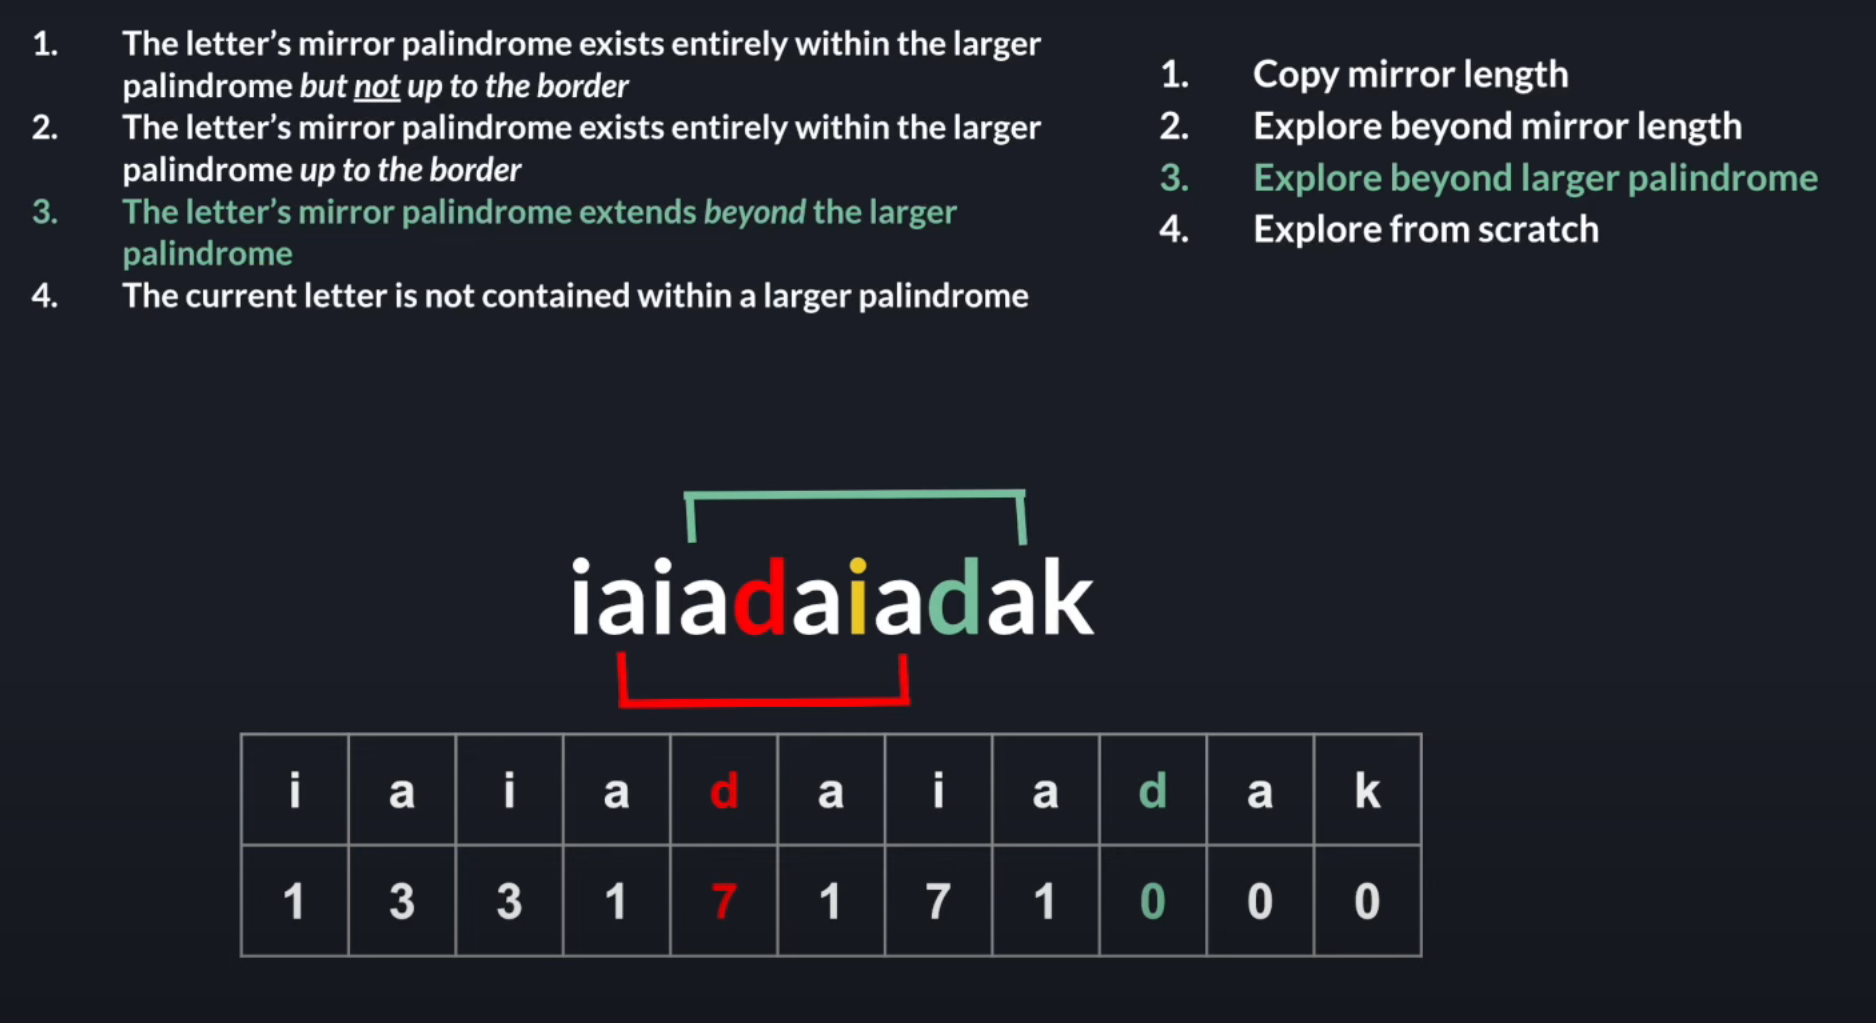

In [11]:
#SimlyPocky"s code(98.82% beat)
class Solution:        
    def longestPalindrome(self, s: str) -> str:
        # Inserting dummy characters: adding "#"in front, back, between s -> this creates every s(even or odd length string) in to odd length string
        # doing this able you to use just one kind of method for solving this problem
        s_prime = "#" + "#".join(s) + "#"
        radii = [0 for _ in range(len(s_prime))]    # the storige for each lenght oriented by every center, which has started
        center = 0
        right_border = 0
        max_radius = 0
        largest_palindrome_center = 0 # strige for back-tracking the result

        for i in range(len(s_prime)):
            mirror = center - (i - center)

            # if the current letter exists within a larger palindrome
            if i < right_border:
                # if the mirror palindrome dose Not extend beyond the border of the palindrome at 'center'
                if radii[mirror] < right_border - i:
                    radii[i] = radii[mirror]
                    continue
                # if the mirror  palindrome extends beyond the border of the palindrome at 'center'
                # then we know that the radius of the palindrome centered at 's_prime[i]' is >= right_border-1
                else:
                    radii[i] = right_border - i
            
            # now we need to explore beyond the minimum guarateed length defined in line 25
            # if 's_prime[i]' is Not within a larger palindrome, then 'radii[i]' would be 0 and we'd be exploring form scratch
            while i - 1 - radii[i] >= 0 \
                and i + 1 + radii[i] < len(s_prime) \
                and s_prime[i - 1 - radii[i]] == s_prime[i + 1 + radii[i]]:

                radii[i] += 1

            # if the palindrome centered at 'i' extend beyond the palindrome centered at 'center'
            if i + radii[i] > right_border:
                # reset center and right_border to 'i' and 'i+radii[i]' because the current palindrome is the palindrome that reaches the furthest to the right
                center = i
                right_border = i + radii[i]
            
            if radii[i] > max_radius:
                max_radius = radii[i]
                largest_palindrome_center = i
        start_index = (largest_palindrome_center - max_radius) // 2
        return s[start_index : start_index + max_radius]